In [1]:
import sys
import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# RANK FUCNTION FOR LAST COLUMN STRING
POS:  position of the character who's rank we have to find<br>
DELTA:  delta parameter<br>
S:  the string in which we are searching for rank<br>


In [2]:
def rank(pos, delta, s):
    # calculates the rank of the char at the position pos
    # in the string s, using delta as the milestone

    # Parameters:
    # pos: position of the char
    # delta: rank opperation space optimization parameter
    # s: input string

    # Returns:
    # a tupple (rank of char at pos, time taken, memory consumed)

    n = len(s)
    N = n//delta

    cnt = 0
    idx = pos - 1
    a = [0] * N if n % delta == 0 else [0] * (N + 1) #initializing the rank array

    for i in range(N):

        start = i * delta
        end = (i + 1)*delta

        for j in range(start, end):
            if s[j] == s[idx]:
                cnt += 1

        a[i] = cnt #populating the rank array for each delta step

    for j in range(N * delta, n): #edge case: if string legnth not divisble by delta
        if s[j] == s[idx]:
            cnt += 1

        a[n//delta] = cnt

    r = 0

    start = time.time()
    if pos % delta == 0: 

        r = a[(pos//delta) - 1]
        r -= 1

    else:
        lb = (pos//delta) * delta #creating the upper and lower bound in which we have to iterate
        ub = min(n, lb + delta)

        if idx - lb <= ub - idx: #finding the bound which is closest

            r = a[(pos//delta) - 1] if pos >= delta else 0

            for i in range(lb, idx):
                if s[i] == s[idx]:
                    r += 1
        else:
            r = a[pos//delta]

            for i in range(idx, ub):
                if s[i] == s[idx]:
                    r -= 1

    end = time.time()

    t = end - start
    m = (sys.getsizeof(a) - 56)//2 #memory taken for calculating the rank using delta milestone
    return (r, t, m) #(rank, time, memory)

Testing the rank method for sample string

In [3]:
s = ''.join(np.random.choice(('C', 'G', 'T', 'A'), 21)) #creating a rondom genomic sequence of fixed length

print(s)
for delta in range(1, len(s) + 1): #for each (delta, pos) print the rank
    print(f"delta: {delta}:", end = " ")
    for pos in range(1, len(s) + 1):
        print(rank(pos, delta, s)[0], end = " ")
    print("\n")

CACGTGATGGCATGCGGCGTG
delta: 1: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 2: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 3: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 4: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 5: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 6: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 7: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 8: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 9: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 10: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 11: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 12: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 13: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 14: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 15: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 16: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 17: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8 

delta: 18: 0 0 1 0 0 1 1 1 2 3 2 2 2 4 3 5 6 4 7 3 8

Generating a random gene-sequence of length 10^6

In [4]:
last_col = ''.join(np.random.choice(('C', 'G', 'T', 'A'), 1000000)) #creating a genomic sequence of length 10^6

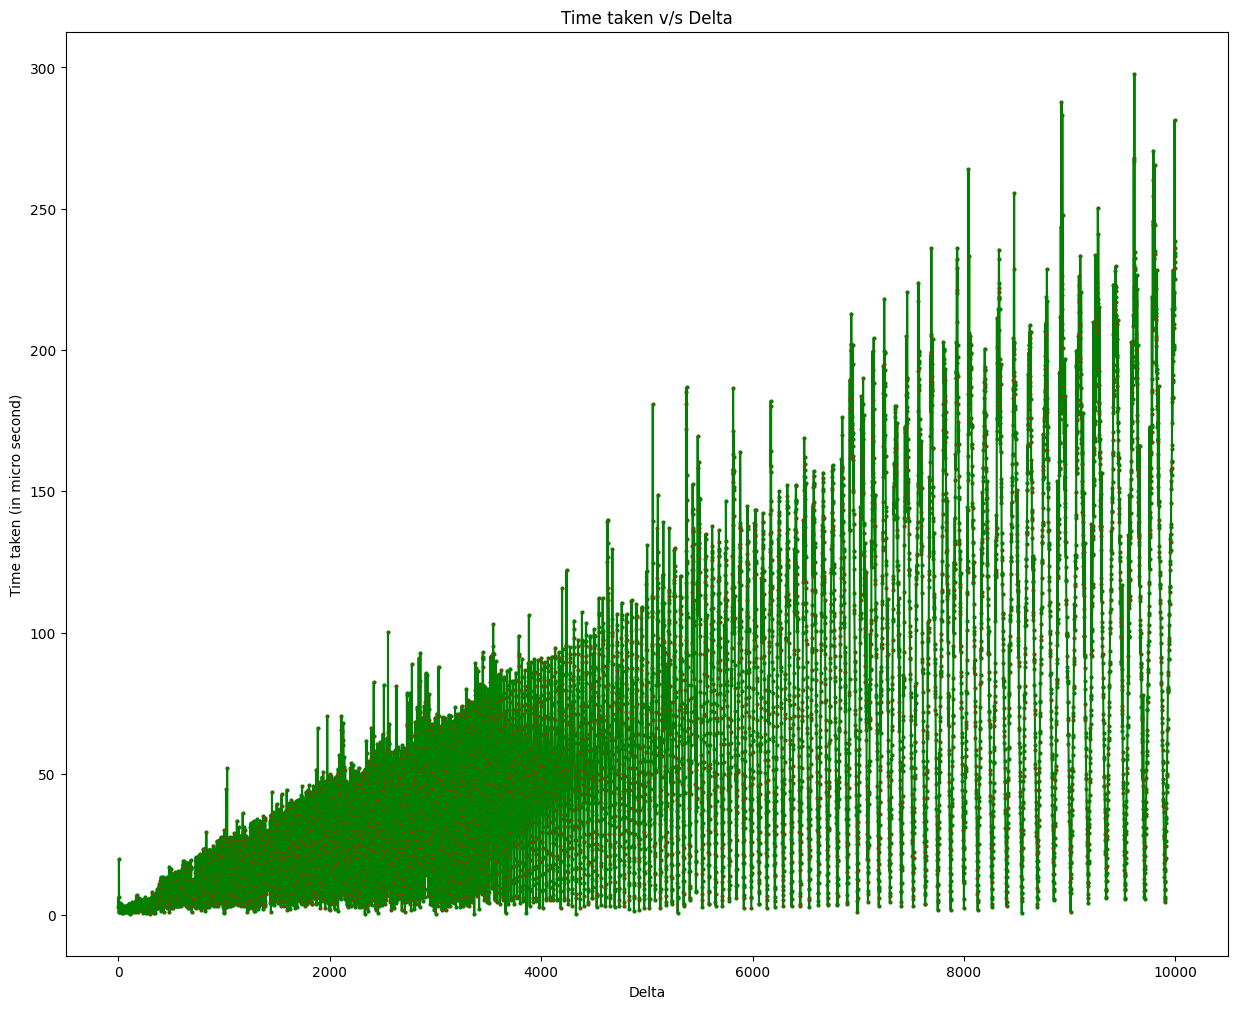

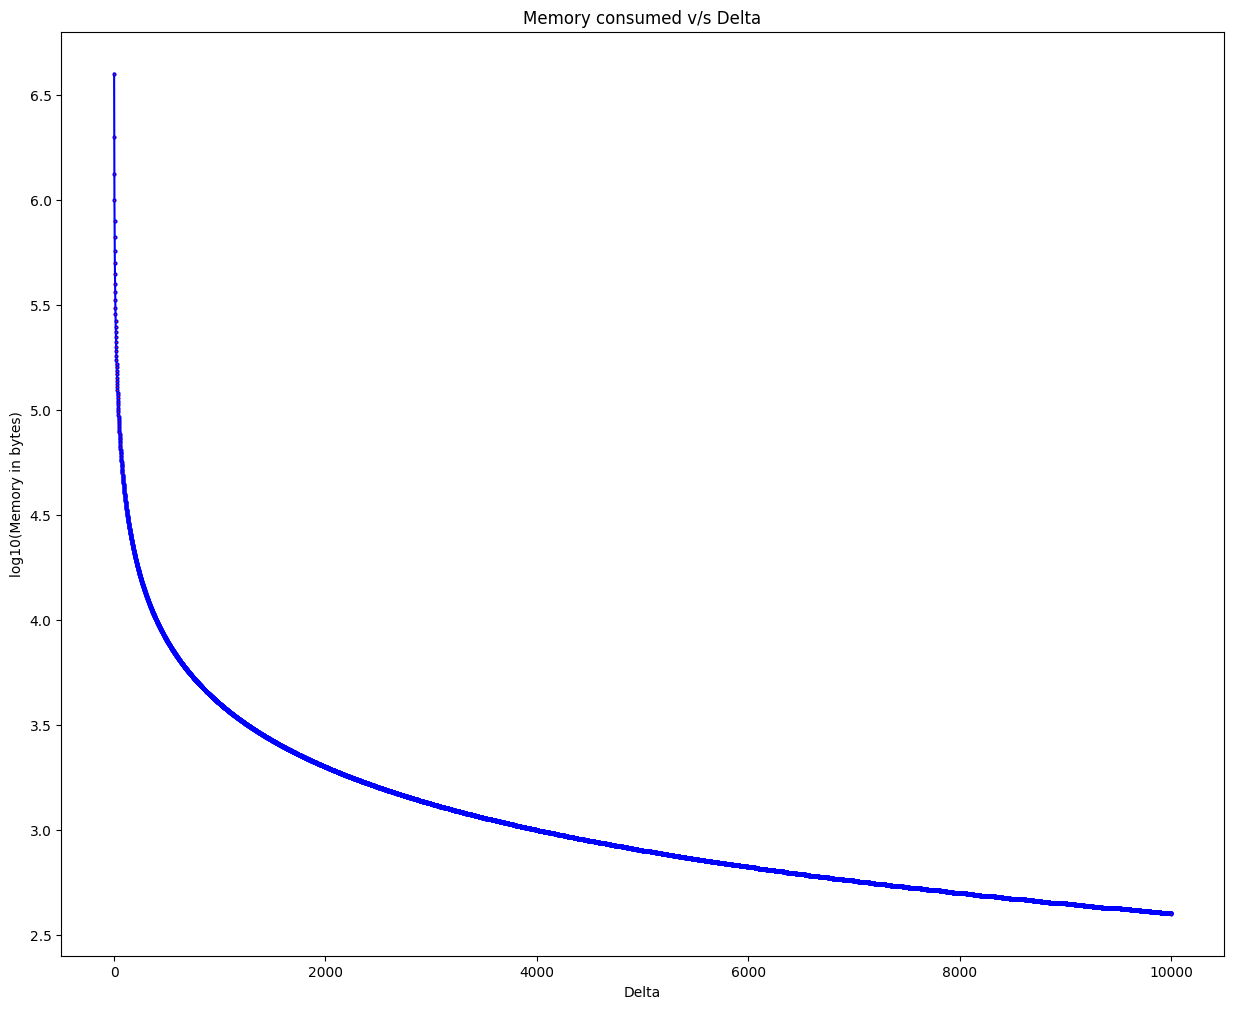

In [5]:
n = len(last_col)

t = [] #time
m = [] #memory
d = [] #delta
for delta in range(1, 10001):

    pos = n//2
    pos += delta//2 #position used for finding the rank

    r = rank(pos, delta, last_col)
    d.append(delta)
    t.append(r[1]*1E6)
    m.append(math.log10(r[2]))

plt.figure(figsize=(15, 12)) #plotting the time consumed v/s delta plot
plt.plot(d, t, color = "green",  linestyle = 'solid', marker = 'o', markerfacecolor = 'red', markersize = 2)
plt.title("Time taken v/s Delta")
plt.xlabel("Delta")
plt.ylabel("Time taken (in micro second)")
plt.show()

plt.figure(figsize=(15, 12)) #plotting the memory consumed v/s delta plot
plt.plot(d, m, color = "blue",  linestyle = 'solid', marker = 'o', markerfacecolor = 'red', markersize = 2)
plt.title("Memory consumed v/s Delta")
plt.xlabel("Delta")
plt.ylabel("log10(Memory in bytes)")
plt.show()